c:\Users
c:\
=========iteration0=========
std=0.01:2.302537857735146
Xavier:2.300078804205226
He:2.3474900113865758
=========iteration100=========
std=0.01:2.3027228292164876
Xavier:2.2619706497628194
He:1.6908870239400993
=========iteration200=========
std=0.01:2.302036082179756
Xavier:2.1781379771563727
He:0.9615337791537244
=========iteration300=========
std=0.01:2.30059389900071
Xavier:1.9755598087741235
He:0.5228100548534238
=========iteration400=========
std=0.01:2.3006333070825997
Xavier:1.554259303022144
He:0.3958330690955204
=========iteration500=========
std=0.01:2.2996745830875494
Xavier:0.9618943154788844
He:0.4170431118046626
=========iteration600=========
std=0.01:2.299092908220933
Xavier:0.7640484291099606
He:0.27571759577350796
=========iteration700=========
std=0.01:2.3022341844586327
Xavier:0.5850762157769981
He:0.27906509001579966
=========iteration800=========
std=0.01:2.301408305633969
Xavier:0.5777351562475813
He:0.27789489060614403
=========iteration900=========


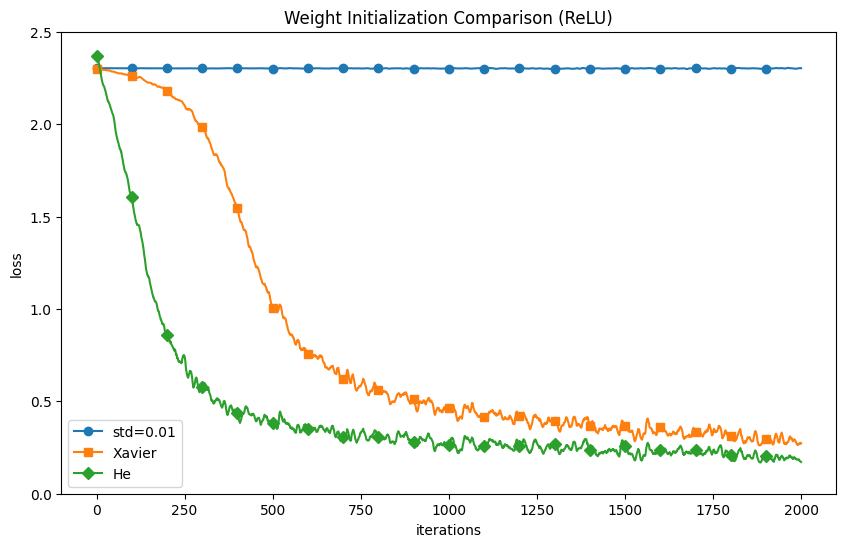

In [10]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

weight_init_types = {'std=0.01':0.01, 'Xavier': 'sigmoid', 'He' : 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}

for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, 
                                  hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, 
                                  weight_init_std=weight_type)
    train_loss[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in networks.keys():
        grads = networks[key].gradient(x_batch,t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch,t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("=========" + "iteration" + str(i)+"=========")
        for key in networks.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {"std=0.01": "o", "Xavier": "s", "He": "D"}
x = np.arange(max_iterations)

plt.figure(figsize=(10, 6))
for key in networks.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5) # 범위를 조금 넓혔습니다
plt.legend()
plt.title("Weight Initialization Comparison (ReLU)")
plt.show()

